# 자연처리 프레임워크 및 라이브러리 설치하기

In [1]:
# colab에 Mecab설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [2]:
%cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [3]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 51.7MB/s 
     |████████████████████████████████| 92kB 12.7MB/s 
     |████████████████████████████████| 450kB 42.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-06-25 08:23:56--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c3:9b0a, 2406:da00:ff00::22c2:513, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=l%2FAwqMS7BlAVybUyE8Co8WOnHxA%3D&Expires=1624610897&AWSAccessKeyId=AKIA6KOSE3

#  스팀 리뷰 데이터의 이해와 전처리

In [5]:
# 필요 프레임워크 및 라이브러리 준비
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 로드

In [6]:
# 데이터 다운 로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/steam.txt", filename="steam.txt")

('steam.txt', <http.client.HTTPMessage at 0x7f135d4d34d0>)

In [10]:
# 열 제목 추가
total_data = pd.read_table('steam.txt', names=['label', 'reviews'],)
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 100000


In [11]:
# 훈련 데이터 내용 확인
total_data[:5]

,label,reviews
0,0,노래가 너무 적음
1,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요


In [12]:
# 중복 체크
total_data['reviews'].nunique(), total_data['label'].nunique()

(99892, 2)

In [13]:
# 중복 제거
total_data.drop_duplicates(subset=['reviews'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 99892


In [14]:
# NULL값 유무 체크
print(total_data.isnull().values.any())

False


# 훈련데이터와 테스트 데이터 분리하기

In [15]:
# 훈련데이터와 테스트 데이터 분리 3:1
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 74919
테스트용 리뷰의 개수 : 24973


# 레이블 분포 확인

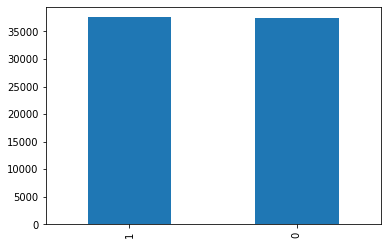

In [16]:
# 훈련 데이터에서의 레이블 값의 분포 확인
r

In [17]:
# 균일해보이지만 정확하게 몇개인지 확인해보자
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  37376
1      1  37543


# 데이터 정제하기

In [18]:
# 훈련데이터에 한글과 공백을 제외하고 모두 제거해보자
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,label,reviews
17152,1,게임 클리어 할 때까지 계속 새롭고 질리지 않습니다 정말 잘 만든 퍼즐 게임입니다 ...
59872,0,편 나름 재밌게 했으면 그걸로 멈추는게 좋았네
40613,0,할거 드럽게 없음
80196,0,ㅈ까라 이건 그거 하나만으로도 살 가치가 없는 겜 내가 저거 때문에 이 겜 시에 ...
35283,0,돈 아깝다


In [19]:
# 공백 데이터를 null값으로 변경
train_data['reviews'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

label      0
reviews    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [20]:
# test데이터에도 전처리 과정 진행
test_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['reviews'].copy().replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 24973


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# 토큰화

In [21]:
# 형태소 분석기 연습해보기 (KoNLPy의 Mecab)
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '뻔']


In [22]:
# 불용어 정의 (한국어 조사, 접속사 등) = 30
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면']

In [28]:
# 훈련데이터에 형태소 분석기를 사용하여 토큰화를 하면서 불용어 제거
train_data['tokenized'] = train_data['reviews'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data['tokenized'] = test_data['reviews'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
print(train_data[:3])
print(test_data[:3])

       label  ...                                          tokenized
17152      1  ...  [클리어, 할, 때, 까지, 계속, 새롭, 질리, 않, 습니다, 정말, 잘, 만든,...
59872      0  ...                  [편, 나름, 재밌, 했, 으면, 그걸로, 멈추, 좋, 았]
40613      0  ...                                      [할, 거, 드럽, 없]

[3 rows x 3 columns]
       label  ...                                          tokenized
89965      0  ...             [인디, 사, 나, 후회, 합니다, 환불, 해야, 데, 놓쳤, ㅡㅡ]
63982      0  ...  [퀵, 인터페이스, 바꾸, 모션, 조차, 하나, 없, 자원, 라고, 손, 셀, 정도...
97282      1  ...                          [아기, 자기, 하고, 재미있, 네요, ㅎㅎ]

[3 rows x 3 columns]


# 단어와 길이 분포 확인하기

In [30]:
# 각 긍/부정 별 단어 빈도 체크
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [31]:
# 부정 단어 빈도수 카운트
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('안', 8129), ('없', 7141), ('는데', 5786), ('있', 5692), ('같', 4247), ('로', 4083), ('할', 3920), ('거', 3902), ('나', 3805), ('해', 3653), ('너무', 3522), ('으로', 3351), ('기', 3348), ('했', 3265), ('어', 3143), ('보', 2987), ('습니다', 2962), ('것', 2935), ('지만', 2911), ('좋', 2899)]


In [32]:
# 긍정 단어 빈도수 카운트
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('있', 9987), ('좋', 6542), ('습니다', 5179), ('재밌', 4997), ('할', 4838), ('지만', 4809), ('해', 4354), ('없', 4145), ('보', 3907), ('으로', 3900), ('로', 3879), ('수', 3835), ('는데', 3825), ('기', 3592), ('안', 3368), ('것', 3362), ('같', 3356), ('네요', 3189), ('어', 3112), ('나', 3055)]


긍정 리뷰의 평균 길이 : 14.948459100231734
부정 리뷰의 평균 길이 : 15.284193065068493


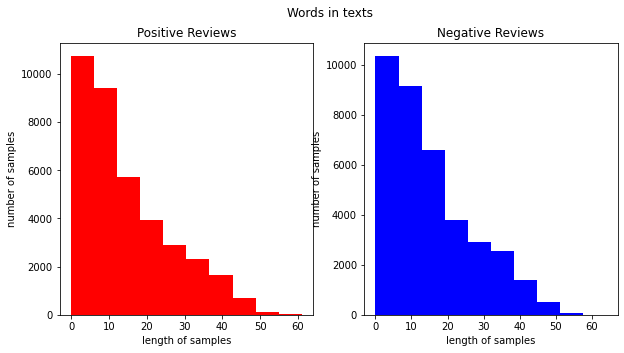

In [33]:
# 긍정, 부정 데이터별 길이 분포 체크
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [34]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

#테스트 데이터 분포 체크

In [79]:
# 각 긍/부정 별 단어 빈도 체크
negative_words = np.hstack(test_data[test_data.label == 0]['tokenized'].values)
positive_words = np.hstack(test_data[test_data.label == 1]['tokenized'].values)

In [80]:
# 부정 단어 빈도수 카운트
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('안', 2771), ('없', 2386), ('있', 2040), ('는데', 1915), ('같', 1377), ('로', 1372), ('할', 1323), ('거', 1300), ('나', 1259), ('해', 1243), ('너무', 1160), ('으로', 1148), ('했', 1137), ('기', 1109), ('어', 1066), ('보', 1037), ('습니다', 1013), ('겠', 991), ('좋', 991), ('것', 990)]


In [81]:
# 긍정 단어 빈도수 카운트
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('있', 3191), ('좋', 2051), ('습니다', 1717), ('할', 1650), ('재밌', 1616), ('지만', 1565), ('없', 1446), ('해', 1415), ('보', 1336), ('로', 1297), ('수', 1292), ('으로', 1232), ('기', 1218), ('는데', 1200), ('안', 1165), ('같', 1125), ('것', 1109), ('나', 1038), ('네요', 1029), ('어', 1020)]


긍정 리뷰의 평균 길이 : 14.886064713951423
부정 리뷰의 평균 길이 : 15.301112877583465


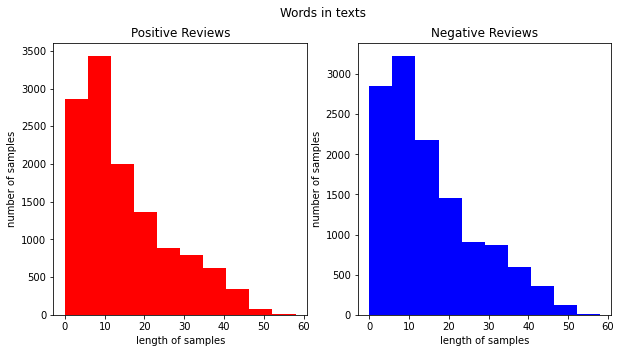

In [83]:
# 긍정, 부정 데이터별 길이 분포 체크
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = test_data[test_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = test_data[test_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

# 전체 데이터, 형태소별 빈도 분포 체크


In [88]:
train_all_words = np.hstack(train_data['tokenized'].values)
test_all_words = np.hstack(test_data['tokenized'].values)

In [89]:
train_all_word_count = Counter(train_all_words)
print(train_all_word_count.most_common(20))
test_all_word_count = Counter(test_all_words)
print(test_all_word_count.most_common(20))

[('있', 15679), ('안', 11497), ('없', 11286), ('는데', 9611), ('좋', 9441), ('할', 8758), ('습니다', 8141), ('해', 8007), ('로', 7962), ('지만', 7720), ('같', 7603), ('으로', 7251), ('기', 6940), ('보', 6894), ('나', 6860), ('거', 6743), ('재밌', 6644), ('것', 6297), ('했', 6271), ('어', 6255)]
[('있', 5231), ('안', 3936), ('없', 3832), ('는데', 3115), ('좋', 3042), ('할', 2973), ('습니다', 2730), ('로', 2669), ('해', 2658), ('지만', 2538), ('같', 2502), ('으로', 2380), ('보', 2373), ('기', 2327), ('나', 2297), ('거', 2208), ('재밌', 2168), ('했', 2125), ('것', 2099), ('어', 2086)]


In [104]:
print( train_data['tokenized'])

17152    [클리어, 할, 때, 까지, 계속, 새롭, 질리, 않, 습니다, 정말, 잘, 만든,...
59872                    [편, 나름, 재밌, 했, 으면, 그걸로, 멈추, 좋, 았]
40613                                        [할, 거, 드럽, 없]
80196    [ㅈ, 까라, 이건, 그거, 하나, 으로, 살, 가치, 없, 내, 저거, 때문, 시...
35283                                              [돈, 아깝]
                               ...                        
6265                                         [쯤, 생존자, 살인마]
54920    [시간, 때우, 기, 매우, 좋, 특히, 군사, 전략, 좋, 아, 한다면, 번, 해...
76885    [스팀, 출시, 돼, 나서, 야, 알, 었, 지만, 지금, 라도, 알, 돼, 다행이...
860                                     [점프, 어렵, 금방, 끝, 남]
15799    [더, 워킹, 데드, 아직, 안, 해, 보, 셨, 나요, 스토리, 위주, 로, 진행...
Name: tokenized, Length: 74919, dtype: object


In [ ]:
# 형태소별 빈도 분포 체크
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = test_data['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [96]:
print(text_len)

89965    10
63982    26
82792    43
60954    12
67062    35
         ..
10973     5
21487    33
94408    16
17488     4
57500    25
Name: tokenized, Length: 12580, dtype: int64


# 정수 인코딩

In [35]:
# 기계가 텍스트를 숫자로 처리할 수 있도록 데이터를 정수로 변환
# 일단 단어 집합을 만들자
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [37]:
# 등장 빈도수가 낮은 데이터를 처리해보자
# 2회 미만 단어는 비중이 몇인지 체크
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 32817
등장 빈도가 1번 이하인 희귀 단어의 수: 13878
단어 집합에서 희귀 단어의 비율: 42.28905750068562
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.2254607619437832


In [38]:
# 전체 단어 개수 중 빈도수 2미만인 단어는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 18941


In [39]:
# 단어집합을 케라스 토크나이저의 인자로 넘겨주면, 케라스 토크나이저는 텍스트 시퀀스를 숫자 시퀀스로 변환
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# # 숫자 시퀀스 데이터의 분포를 보고 싶다.

In [94]:
train_all_words = np.hstack(X_train)
train_all_word_count = Counter(train_all_words)
print(train_all_word_count.most_common(20))

[(0, 3360876), (2, 15679), (1, 13878), (3, 11497), (4, 11286), (5, 9611), (6, 9441), (7, 8758), (8, 8141), (9, 8007), (10, 7962), (11, 7720), (12, 7603), (13, 7251), (14, 6940), (15, 6894), (16, 6860), (17, 6743), (18, 6644), (19, 6296)]


In [95]:
train_all_word_count = Counter(np.hstack(X_test))
print(train_all_word_count.most_common(20))

[(0, 1121409), (1, 7889), (2, 5231), (3, 3936), (4, 3832), (5, 3115), (6, 3042), (7, 2973), (8, 2730), (10, 2669), (9, 2658), (11, 2538), (12, 2502), (13, 2380), (15, 2373), (14, 2327), (16, 2297), (17, 2208), (18, 2168), (20, 2125)]


In [103]:
#print(train_all_word_count.values())
#print(train_all_word_count.keys())

X_train_word_count = train_all_word_count.keys()
print(X_train_word_count)
Y_train_word_count = train_all_word_count.values()
print(Y_train_word_count)

dict_keys([0, 728, 34, 16, 431, 52, 106, 132, 99, 6461, 453, 4527, 687, 835, 712, 792, 108, 4, 1779, 95, 370, 3519, 81, 558, 1904, 4189, 262, 169, 61, 25, 363, 35, 87, 974, 19, 6294, 6422, 1792, 806, 685, 49, 23, 349, 1898, 1750, 623, 53, 922, 249, 1280, 642, 1312, 182, 29, 1077, 11, 271, 515, 82, 125, 104, 36, 809, 41, 408, 9, 264, 786, 488, 33, 263, 1922, 437, 66, 358, 12866, 7115, 1, 236, 2567, 16058, 117, 5658, 156, 5547, 141, 79, 1499, 4262, 211, 32, 1858, 60, 17, 138, 829, 85, 1402, 8721, 225, 7, 436, 219, 2, 6, 145, 28, 69, 152, 183, 495, 900, 27, 711, 13238, 1020, 1094, 443, 1722, 40, 194, 44, 636, 196, 2276, 1567, 73, 68, 212, 42, 14, 327, 24, 542, 45, 1045, 5090, 3176, 134, 296, 47, 78, 400, 373, 2637, 46, 21, 661, 450, 3, 267, 214, 1024, 1291, 227, 13, 832, 122, 706, 1983, 20, 2753, 72, 31, 55, 270, 18, 8, 9292, 1846, 253, 682, 3863, 362, 10, 1219, 30, 736, 620, 43, 140, 4051, 355, 5709, 2521, 197, 369, 1379, 4586, 492, 1604, 1899, 75, 293, 469, 64, 243, 154, 51, 368, 135, 1

TypeError: ignored

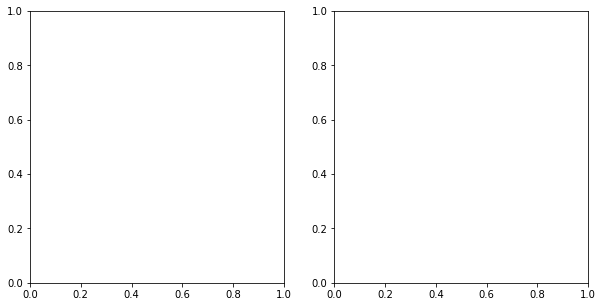

In [122]:
# 형태소별 빈도 분포 체크
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(Y_train_word_count, color='red')
ax1.set_title('훈련데이터셋 형태소(단어) 빈도')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('훈련데이터셋 형태소 빈도 평균 :', np.mean(text_len))

In [117]:
#temp = pd.cut(Y_train_word_count,
#            bins=[0.0, 1000., 5000., 10000., 1000000., np.inf],
#            labels=[1, 2, 3, 4, 5])
df.apply(pd.cut, bins=[0, 1000, 5000, 10000, 1000000, np.inf])

NameError: ignored

In [ ]:
housing["income_cat"].value_counts()

In [ ]:
housing["income_cat"].hist()

In [40]:
print(X_train[:3])
print(X_test[:3])

[[495, 7, 35, 87, 149, 2429, 599, 26, 8, 70, 47, 235, 111, 38, 44, 52], [161, 300, 18, 20, 63, 3582, 985, 6, 56], [7, 17, 1476, 4]]
[[728, 34, 16, 431, 52, 106, 132, 99, 6461, 453], [4527, 687, 835, 712, 792, 108, 4, 1779, 95, 370, 3519, 81, 558, 1904, 4189, 262, 169, 61, 25, 363, 35, 87, 974, 19, 6294, 6422], [1792, 806, 685, 49, 23, 349]]


In [41]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

# 빈 샘플(empty samples)제거

In [42]:
# 각 샘플의 길이가 0인 샘플들의 인덱스 확인
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [43]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

74889
74889


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# 패딩

리뷰의 최대 길이 : 64
리뷰의 평균 길이 : 15.122007237377986


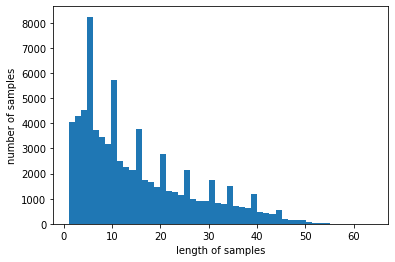

In [44]:
# 서로 다른 길이의 샘플들의 길이를 동일하게 맞춰는 작업
# 전체 데이터에서 가장 길이가 긴 리뷰와, 전체의 길이분포를 알아보자
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [45]:
# 최적의 길이를 찾기 위해, 전체 샘플중 길이가 max_len 이하인 샘플의 비율을 확인하는 함수 생성
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [46]:
# 60 이하 비율 체크
max_len = 60
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 60 이하인 샘플의 비율: 99.99599407122541


In [47]:
# 99%가 60이하 이므로 모든 샘플길이를 60으로 결정
# 짧은 데이터는 0을 채우고, 60을 넘는 긴 데이터는 손실됨
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

# BiLSTM으로 네이버 영화 리뷰 감성 분류하기

In [49]:
# 필요한 프레임워크 및 라이브러리 임포트
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [51]:
# 임베딩 벡터의 차원은 100으로, 리뷰분류를 위해 LSTM 사용
# 왜 100인지는 모름
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))

In [53]:
# 검증 데이터 손실이 4회 증가하면 학습 조기 종료
# model check point를 사용하여 검증 데이터의 정확도가 이전보다 좋아질 경우만 모델 저장
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [124]:
# 에포크 15번 수행, 훈련데이터중 20%를 검증데이터로 사용하며 정확도 체크
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=256, validation_split=0.2, shuffle=True)

Epoch 1/15
147/147 [==============================] - 8s 36ms/step - loss: 0.1676 - acc: 0.9345 - val_loss: 0.4509 - val_acc: 0.8525

Epoch 00001: val_acc improved from 0.78428 to 0.85248, saving model to best_model.h5
Epoch 2/15
147/147 [==============================] - 5s 31ms/step - loss: 0.1408 - acc: 0.9453 - val_loss: 0.4417 - val_acc: 0.8579

Epoch 00002: val_acc improved from 0.85248 to 0.85787, saving model to best_model.h5
Epoch 3/15
147/147 [==============================] - 5s 31ms/step - loss: 0.1237 - acc: 0.9517 - val_loss: 0.4791 - val_acc: 0.8509

Epoch 00003: val_acc did not improve from 0.85787
Epoch 4/15
147/147 [==============================] - 5s 31ms/step - loss: 0.1092 - acc: 0.9579 - val_loss: 0.5441 - val_acc: 0.8400

Epoch 00004: val_acc did not improve from 0.85787
Epoch 5/15
147/147 [==============================] - 5s 31ms/step - loss: 0.0969 - acc: 0.9630 - val_loss: 0.5891 - val_acc: 0.8269

Epoch 00005: val_acc did not improve from 0.85787
Epoch 6/15

In [55]:
# 테스트 데이터에서 정확도 측정
loaded_model = load_model('best_model.h5')
result = loaded_model.evaluate(X_test, y_test)
print("\n 테스트 손실률: ",result[0])
print("\n 테스트 손실률: ",result[1])
# evalute()[0] 손실률, [1] 정확도
# print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

781/781 [==============================] - 4s 5ms/step - loss: 0.4699 - acc: 0.7838

 테스트 손실률:  0.46992063522338867

 테스트 손실률:  0.7838465571403503


# 리뷰 예측하기

In [60]:
# 학습한 모델에 새로운 예측값을 얻는 것은 model.predict() 사용
# 그리고 예측할 때에도 동일한 전처리 수행해야함.
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [61]:
sentiment_predict('노잼 ..완전 재미 없음 ㅉㅉ') #ok

90.94% 확률로 부정 리뷰입니다.


In [62]:
sentiment_predict('조금 어렵지만 재밌음ㅋㅋ') #ok

98.13% 확률로 긍정 리뷰입니다.


In [63]:
sentiment_predict('케릭터가 예뻐서 좋아요') #ok

94.93% 확률로 긍정 리뷰입니다.


# 쇼핑 리뷰에 적용시

In [64]:
sentiment_predict('이 상품 진짜 좋아요... 저는 강추합니다. 대박') #ok

99.45% 확률로 긍정 리뷰입니다.


In [65]:
sentiment_predict('진짜 배송도 늦고 개짜증나네요. 뭐 이런 걸 상품이라고 만듬?') #ok

93.62% 확률로 부정 리뷰입니다.


In [66]:
sentiment_predict('판매자님... 너무 짱이에요.. 대박나삼')#ok

96.82% 확률로 긍정 리뷰입니다.


In [67]:
sentiment_predict('ㅁㄴㅇㄻㄴㅇㄻㄴㅇ리뷰쓰기도 귀찮아') #ok

65.24% 확률로 부정 리뷰입니다.


# 영화 리뷰를 예측해보면?

In [71]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ') #ok

99.00% 확률로 긍정 리뷰입니다.


In [72]:
sentiment_predict('이 영화 핵노잼 ㅠㅠ') #ok

86.54% 확률로 부정 리뷰입니다.


In [73]:
sentiment_predict('이딴게 영화냐 ㅉㅉ') #ok

94.78% 확률로 부정 리뷰입니다.


In [74]:
sentiment_predict('감독 뭐하는 놈이냐?') #ok

78.20% 확률로 부정 리뷰입니다.


In [75]:
sentiment_predict('대박 감독 뭐하시는 분?') #ok

68.99% 확률로 긍정 리뷰입니다.


In [76]:
sentiment_predict('와 개쩐다 정말 세계관 최강자들의 영화다') #ok

96.85% 확률로 긍정 리뷰입니다.
